In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Function to plot speedup and scalability
def plot_speedup_scalability(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check if the CSV contains the necessary columns
    required_columns = {'method', 'size', '#w', 'speedup'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"The CSV file must contain the following columns: {required_columns}")

    # Extract unique sizes from the DataFrame
    sizes = df['size'].unique()
    
    for size in sizes:
        plt.figure(figsize=(10, 6))
        
        # Filter the DataFrame for the current size
        df_size = df[df['size'] == size]
        
        # Plot speedup for each method
        for method in df_size['method'].unique():
            if method == 'seq':
                continue  # Skip plotting sequential (speedup is always 1)

            df_method = df_size[df_size['method'] == method]
            plt.plot(df_method['#w'], df_method['speedup'], marker='o', label=method)
        
        # Plot ideal speedup (linear scaling)
        num_workers = df_size['#w'].unique()
        ideal_speedup = num_workers  # Ideal speedup equals the number of workers
        plt.plot(num_workers, ideal_speedup, linestyle='--', color='grey', label='Ideal Speedup')

        # Plot customization
        plt.title(f'Speedup vs. Number of Workers for Matrix Size {size}')
        plt.xlabel('Number of Workers (#w)')
        plt.ylabel('Speedup')
        plt.legend()
        plt.grid(True)
        plt.show()

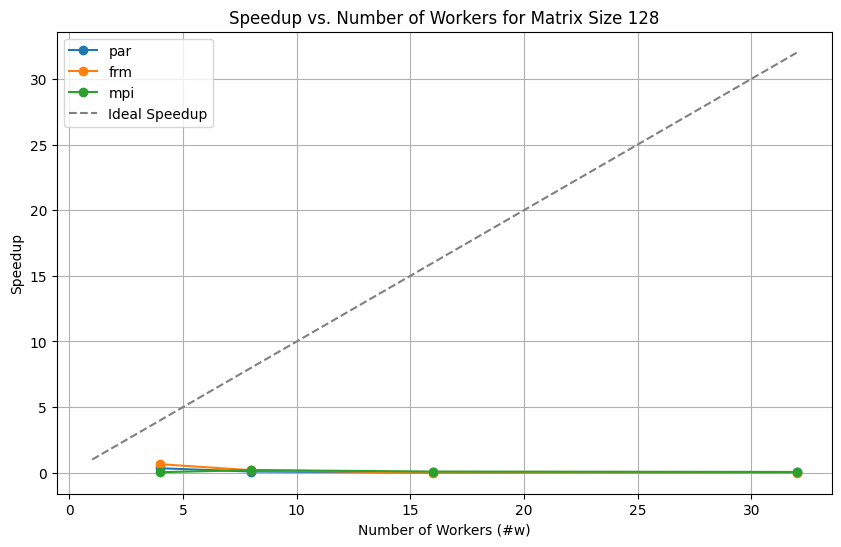

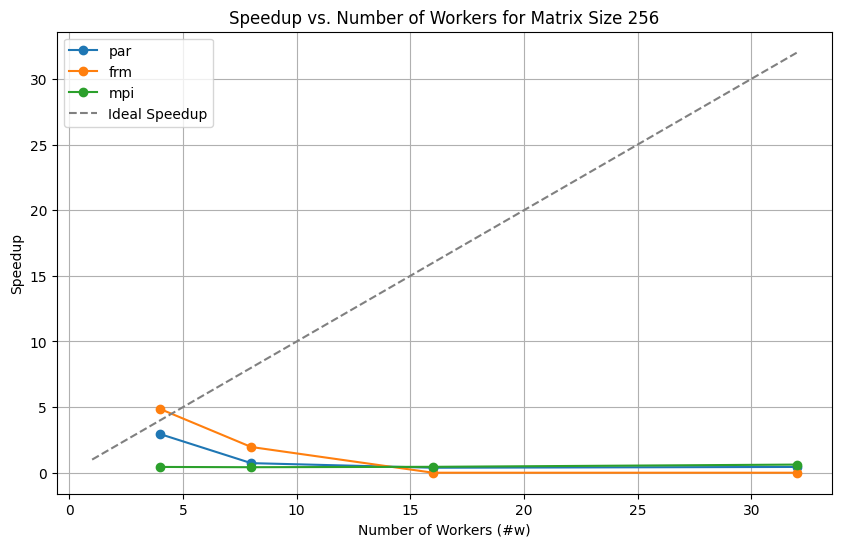

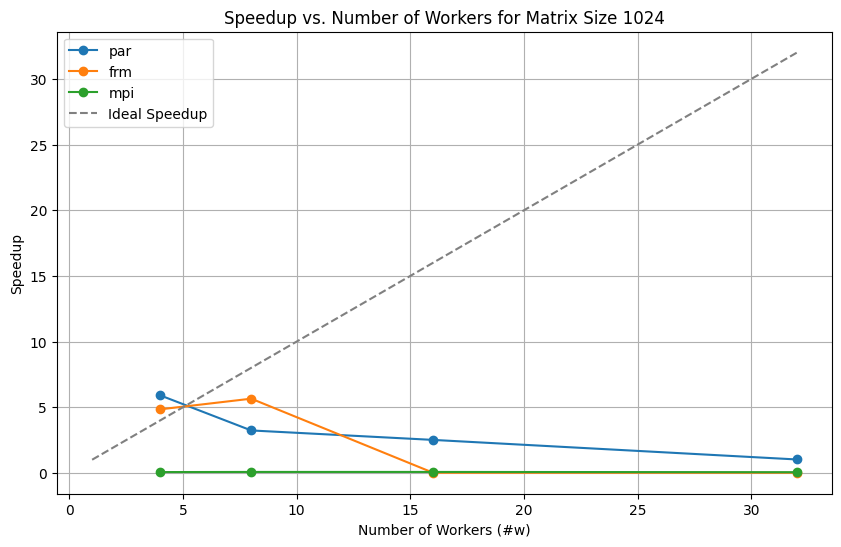

In [4]:
# Example usage
csv_file = './results/speedup_summary.csv'  # Update this path as necessary
plot_speedup_scalability(csv_file)

In [5]:
# Function to plot scalability
def plot_scalability(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check if the CSV contains the necessary columns
    required_columns = {'method', 'size', '#w', 'scalability'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"The CSV file must contain the following columns: {required_columns}")

    # Extract unique sizes from the DataFrame
    sizes = df['size'].unique()
    
    for size in sizes:
        plt.figure(figsize=(10, 6))
        
        # Filter the DataFrame for the current size
        df_size = df[df['size'] == size]
        
        # Plot scalability for each method
        for method in df_size['method'].unique():
            if method == 'seq':
                continue  # Skip plotting sequential (scalability is always 1)

            df_method = df_size[df_size['method'] == method]
            plt.plot(df_method['#w'], df_method['scalability'], marker='o', label=method)
        
        # Plot customization
        plt.title(f'Scalability vs. Number of Workers for Matrix Size {size}')
        plt.xlabel('Number of Workers (#w)')
        plt.ylabel('Scalability')
        plt.legend()
        plt.grid(True)
        plt.show()

In [6]:
# Function to plot strong scalability
def plot_strong_scalability(csv_file):
    df = pd.read_csv(csv_file)
    sizes = df['size'].unique()

    for size in sizes:
        plt.figure(figsize=(10, 6))
        
        df_size = df[df['size'] == size]
        
        # Plot the ideal strong scalability (linear)
        num_workers = df_size['#w'].unique()
        ideal_time = df_size[df_size['#w'] == 1]['time'].values[0] / num_workers
        plt.plot(num_workers, ideal_time, 'k--', label='Ideal Scalability')
        
        for method in df_size['method'].unique():
            if method == 'seq':
                continue

            df_method = df_size[df_size['method'] == method]
            plt.plot(df_method['#w'], df_method['time'], marker='o', label=method)
        
        plt.title(f'Strong Scalability for Matrix Size {size}')
        plt.xlabel('Number of Workers (#w)')
        plt.ylabel('Execution Time (s)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Function to plot weak scalability
def plot_weak_scalability(csv_file):
    df = pd.read_csv(csv_file)
    
    # Calculate problem size as size * #w to represent weak scaling
    df['problem_size'] = df['size'] * df['#w']

    # Extract unique worker counts to analyze weak scalability
    worker_counts = df['#w'].unique()

    for w in worker_counts:
        plt.figure(figsize=(10, 6))
        
        df_workers = df[df['#w'] == w]
        
        # Plot the ideal weak scalability (constant time)
        ideal_time = [df_workers[df_workers['problem_size'] == df_workers['problem_size'].min()]['time'].values[0]] * len(df_workers['problem_size'].unique())
        plt.plot(df_workers['problem_size'].unique(), ideal_time, 'k--', label='Ideal Scalability')
        
        for method in df_workers['method'].unique():
            if method == 'seq':
                continue

            df_method = df_workers[df_workers['method'] == method]
            plt.plot(df_method['problem_size'], df_method['time'], marker='o', label=method)
        
        plt.title(f'Weak Scalability for # Workers = {w}')
        plt.xlabel('Problem Size (size * #w)')
        plt.ylabel('Execution Time (s)')
        plt.legend()
        plt.grid(True)
        plt.show()

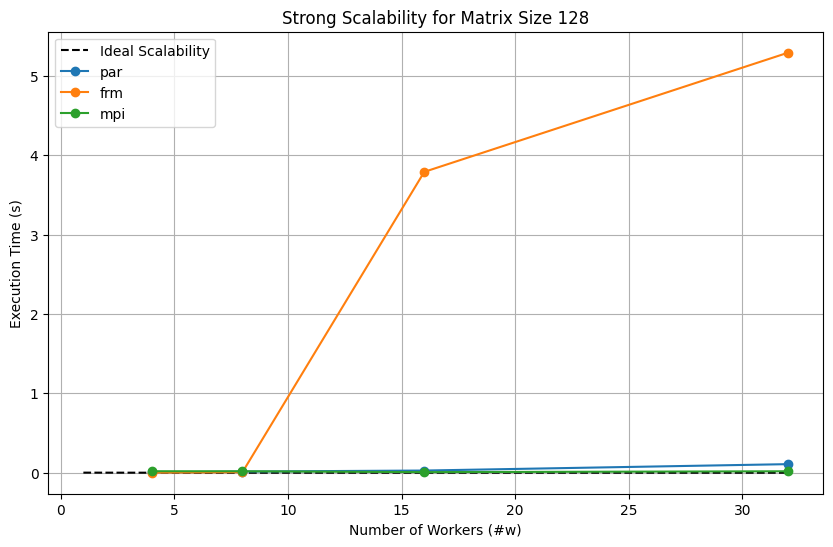

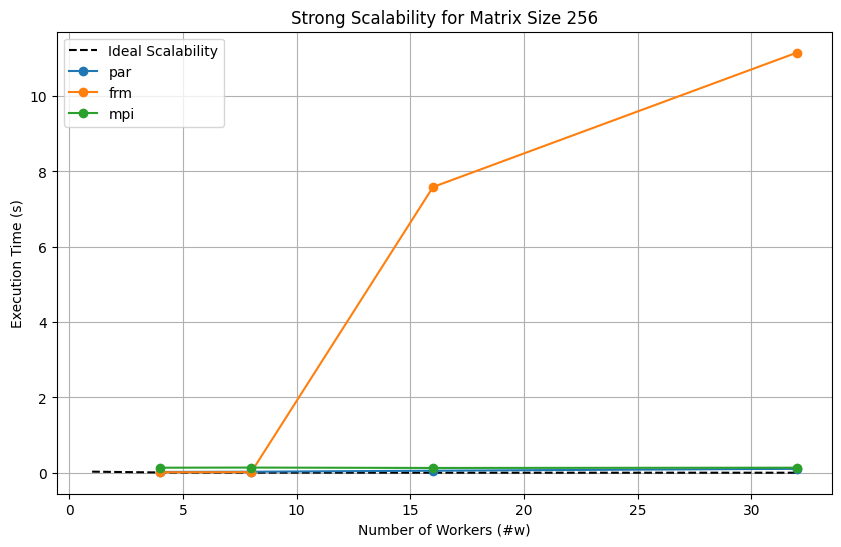

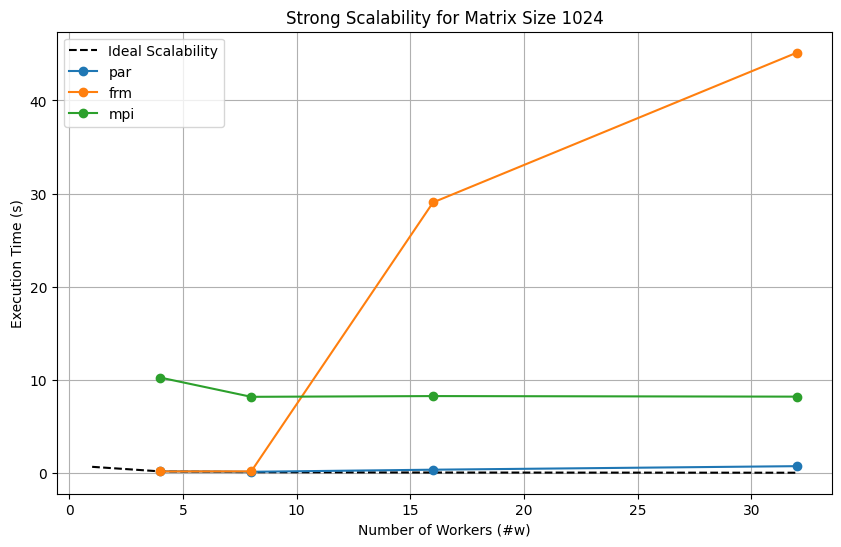

In [12]:
# Example usage
csv_file = './results/speedup_summary01.csv'  # Update this path as necessary
plot_strong_scalability(csv_file)

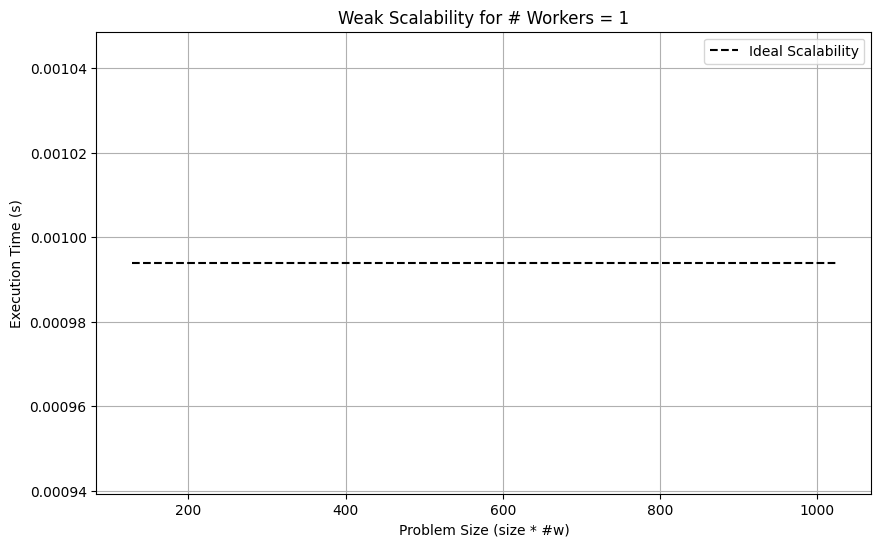

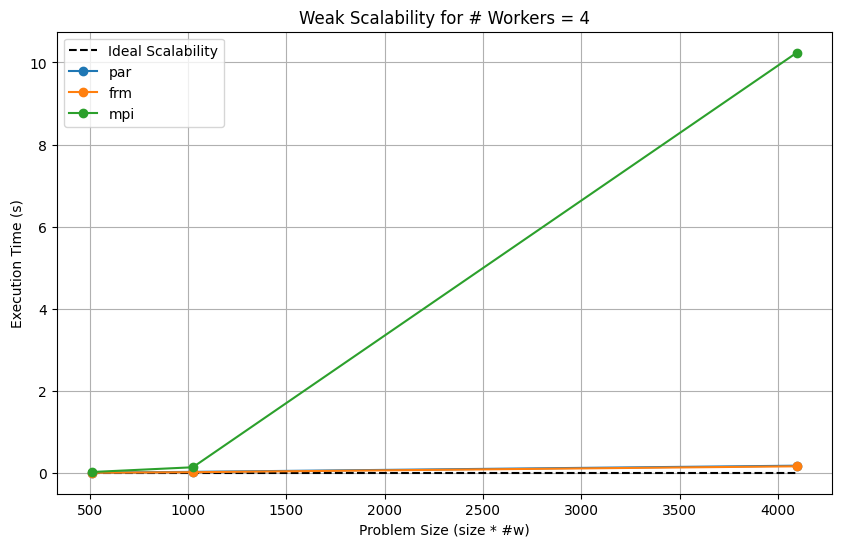

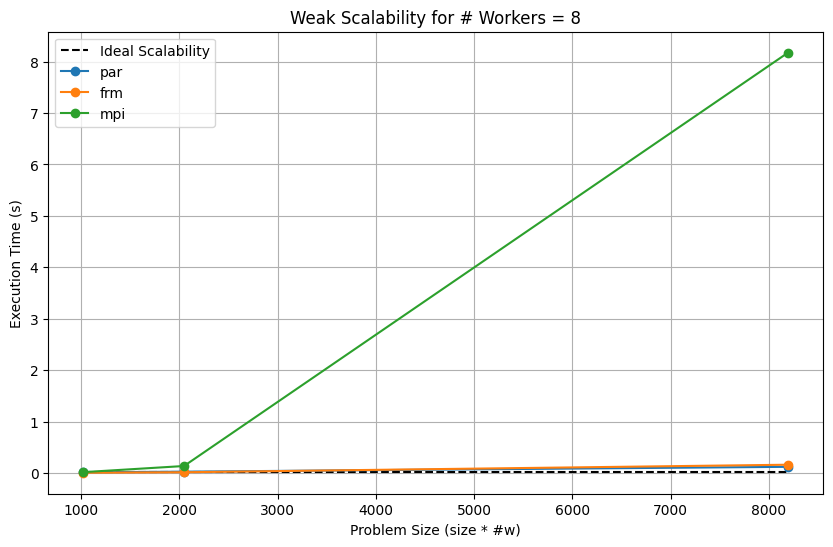

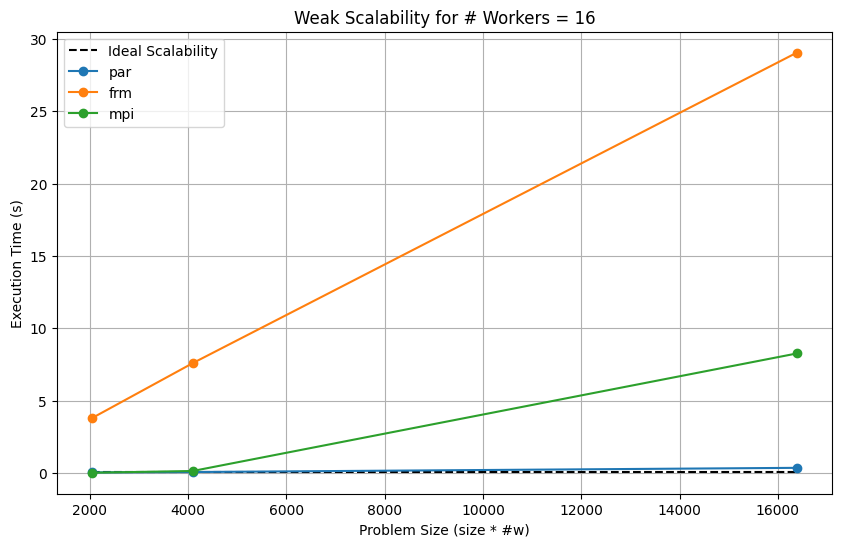

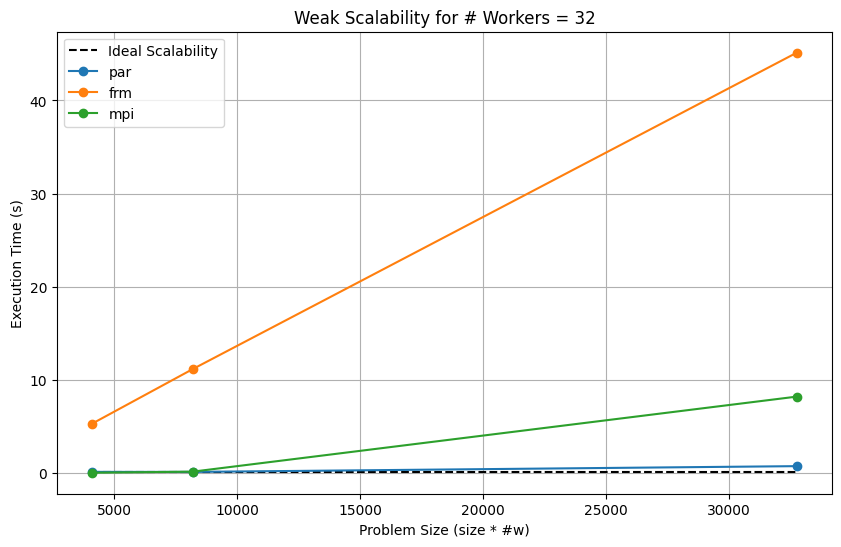

In [13]:
plot_weak_scalability(csv_file)

In [14]:
#define a functio that print in order od method the times for each size and number of workers
def print_times(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check if the CSV contains the necessary columns
    required_columns = {'method', 'size', '#w', 'time'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"The CSV file must contain the following columns: {required_columns}")

    # Extract unique sizes from the DataFrame
    sizes = df['size'].unique()
    
    for method in df['method'].unique():
        print(f"Method: {method}")
        for size in sizes:
            df_size = df[(df['size'] == size) & (df['method'] == method)]
            for w in df_size['#w'].unique():
                time = df_size[df_size['#w'] == w]['time'].values[0]
                # print the values of times from seconds to ms
                print(f"Size: {size}, #w: {w}, Time: {time * 1000:.2f} ms")
        print()


In [11]:
# Example usage
csv_file = './results/speedup_summary.csv'  # Update this path as necessary
print_times(csv_file)

Method: seq
Size: 128, #w: 1, Time: 0.85 ms
Size: 256, #w: 1, Time: 23.20 ms
Size: 1024, #w: 1, Time: 499.33 ms

Method: par
Size: 128, #w: 4, Time: 2.44 ms
Size: 128, #w: 8, Time: 9.27 ms
Size: 128, #w: 16, Time: 32.80 ms
Size: 128, #w: 32, Time: 16.21 ms
Size: 256, #w: 4, Time: 7.89 ms
Size: 256, #w: 8, Time: 31.36 ms
Size: 256, #w: 16, Time: 60.40 ms
Size: 256, #w: 32, Time: 52.72 ms
Size: 1024, #w: 4, Time: 84.60 ms
Size: 1024, #w: 8, Time: 154.18 ms
Size: 1024, #w: 16, Time: 198.43 ms
Size: 1024, #w: 32, Time: 488.85 ms

Method: frm
Size: 128, #w: 4, Time: 1.29 ms
Size: 128, #w: 8, Time: 4.30 ms
Size: 128, #w: 16, Time: 3860.56 ms
Size: 128, #w: 32, Time: 4963.69 ms
Size: 256, #w: 4, Time: 4.78 ms
Size: 256, #w: 8, Time: 11.78 ms
Size: 256, #w: 16, Time: 7466.29 ms
Size: 256, #w: 32, Time: 11403.95 ms
Size: 1024, #w: 4, Time: 103.16 ms
Size: 1024, #w: 8, Time: 88.37 ms
Size: 1024, #w: 16, Time: 28354.18 ms
Size: 1024, #w: 32, Time: 43227.98 ms

Method: mpi
Size: 128, #w: 4, Time: 

In [15]:
# Example usage
csv_file = './results/speedup_summary01.csv'  # Update this path as necessary
print_times(csv_file)

Method: seq
Size: 128, #w: 1, Time: 0.99 ms
Size: 256, #w: 1, Time: 28.90 ms
Size: 1024, #w: 1, Time: 654.55 ms

Method: par
Size: 128, #w: 4, Time: 3.18 ms
Size: 128, #w: 8, Time: 14.82 ms
Size: 128, #w: 16, Time: 27.43 ms
Size: 128, #w: 32, Time: 108.02 ms
Size: 256, #w: 4, Time: 22.37 ms
Size: 256, #w: 8, Time: 27.37 ms
Size: 256, #w: 16, Time: 55.00 ms
Size: 256, #w: 32, Time: 104.38 ms
Size: 1024, #w: 4, Time: 172.80 ms
Size: 1024, #w: 8, Time: 121.53 ms
Size: 1024, #w: 16, Time: 345.19 ms
Size: 1024, #w: 32, Time: 724.64 ms

Method: frm
Size: 128, #w: 4, Time: 1.31 ms
Size: 128, #w: 8, Time: 7.00 ms
Size: 128, #w: 16, Time: 3789.87 ms
Size: 128, #w: 32, Time: 5290.68 ms
Size: 256, #w: 4, Time: 13.72 ms
Size: 256, #w: 8, Time: 16.11 ms
Size: 256, #w: 16, Time: 7586.48 ms
Size: 256, #w: 32, Time: 11151.56 ms
Size: 1024, #w: 4, Time: 157.69 ms
Size: 1024, #w: 8, Time: 162.49 ms
Size: 1024, #w: 16, Time: 29050.59 ms
Size: 1024, #w: 32, Time: 45128.97 ms

Method: mpi
Size: 128, #w: 4,